In [3]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.1.tar.gz (11.8 MB)
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633983 sha256=ac9c8f313e5d536928b0f96f52a9aa378c838ef8bfae614ca603eec8fc1b5cba
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [4]:
import pandas as pd
import numpy as np
from surprise import KNNBasic,Reader, Dataset, SVD
from surprise.model_selection import KFold, cross_validate
import matplotlib.pyplot as plt

**3.a Read data from “ratings small.csv”**

In [6]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines = 1)
ratings_data = Dataset.load_from_file('/content/sample_data/ratings_small.csv', reader=reader)

**3.c Probabilistic Matrix Factorization (PMF)**

In [7]:
Probabilistic_Matrix_Factorization = SVD(biased=False)
cross_validate_pmf = cross_validate(Probabilistic_Matrix_Factorization, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True);

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7786  0.7764  0.7762  0.7808  0.7880  0.7800  0.0043  
RMSE (testset)    1.0054  1.0113  1.0079  1.0114  1.0172  1.0106  0.0040  
Fit time          5.96    5.07    6.17    5.17    5.03    5.48    0.48    
Test time         0.17    0.66    0.21    0.15    0.14    0.27    0.20    




```
# This is formatted as code
```

**3.c User based Collaborative Filtering**

In [10]:
sim_options = {'user_based': True}
User_based_Collaborative_Filtering = KNNBasic(sim_options=sim_options)
cross_validate_ubcf = cross_validate(User_based_Collaborative_Filtering, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7357  0.7453  0.7408  0.7495  0.7457  0.7434  0.0047  
RMSE (testset)    0.9581  0.9684  0.9606  0.9757  0.9728  0.9671  0.0068  
Fit time          0.16    0.21    0.21    0.21    0.16    0.19    0.03    
Test time         1.62    1.64    1.73    1.70    1.69    1.68    0.04    


**3.c Item based CF**

In [12]:
sim_options = {'user_based': False}
Item_based_Collaborative_Filtering = KNNBasic(sim_options=sim_options)
cross_validate_ibcf = cross_validate(Item_based_Collaborative_Filtering, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7210  0.7194  0.7202  0.7225  0.7203  0.7207  0.0010  
RMSE (testset)    0.9350  0.9347  0.9329  0.9351  0.9375  0.9350  0.0015  
Fit time          3.99    5.14    4.65    4.10    4.31    4.44    0.42    
Test time         7.29    7.54    7.35    7.56    7.42    7.43    0.11    


**3.d Comparing the average (mean) performances of User-based collaborative filtering,
item-based collaborative filtering, PMF with respect to RMSE and MAE.**

In [24]:
pmf_mean_results = ('Probabilistic Matrix Factorization', cross_validate_pmf['test_mae'].mean(), cross_validate_pmf ['test_rmse'].mean())
ubcf_mean_results = ('User based Collaborative Filtering', cross_validate_ubcf['test_mae'].mean(), cross_validate_ubcf['test_rmse'].mean())
ibcf_mean_results = ('Item based Collaborative Filtering', cross_validate_ibcf['test_mae'].mean(), cross_validate_ibcf['test_rmse'].mean())

results = [pmf_mean_results, ubcf_mean_results, ibcf_mean_results]

print('Comparing mean values for PMF, User based and Item based')
print('-----------------------------------------------------------')
print("%-33s %12s %12s" % ('Algorithm', 'MAE Mean', 'RMSE Mean'))
print('-----------------------------------------------------------')

for res in results:
  if res[0] == 'PMF':
    print("%-8s %14.3f %12.3f" % (res[0], res[1], res[2]))
  else:
    print("%-8s %9.3f %12.3f" % (res[0], res[1], res[2]))

Comparing mean values for PMF, User based and Item based
-----------------------------------------------------------
Algorithm                             MAE Mean    RMSE Mean
-----------------------------------------------------------
Probabilistic Matrix Factorization     0.780        1.011
User based Collaborative Filtering     0.743        0.967
Item based Collaborative Filtering     0.721        0.935


**3.e Similarities Comparision**

In [25]:
similarities = ['cosine', 'msd', 'pearson']
measures = ['MAE', 'RMSE']
run_results = {
    'ubcf': dict(),
    'ibcf': dict()
}

for similarity in similarities:
  User_based_Collaborative_Filtering = KNNBasic(sim_options={'name': similarity, 'user_based': True})
  Item_based_Collaborative_Filtering = KNNBasic(sim_options={'name': similarity, 'user_based': False})

  print(f"Calculating {similarity} for User Based CF")
  cross_validate_ubcf = cross_validate(User_based_Collaborative_Filtering, ratings_data, measures, verbose=True, cv=5)

  print(f"Calculating {similarity} for Item Based CF")
  cross_validate_ibcf = cross_validate(Item_based_Collaborative_Filtering, ratings_data, measures, verbose=True, cv=5)

  run_results['ubcf'][similarity] = cross_validate_ubcf
  run_results['ibcf'][similarity] = cross_validate_ibcf

Calculating cosine for User Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7702  0.7643  0.7709  0.7627  0.7658  0.7668  0.0032  
RMSE (testset)    0.9976  0.9900  0.9977  0.9864  0.9887  0.9921  0.0047  
Fit time          0.37    0.37    0.40    0.76    0.40    0.46    0.15    
Test time         1.92    1.65    2.00    1.75    1.88    1.84    0.12    
Calculating cosine for Item Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matr

In [42]:
plot_data = {
    'MAE': {
      'cosine': [],
      'msd': [],
      'pearson': []
    },
    'RMSE': {
      'cosine': [],
      'msd': [],
      'pearson': []
    }
}

for k, v in run_results.items():
  for key, result in run_results[k].items():
    plot_data['MAE'][key].append(result['test_mae'].mean())
    plot_data['RMSE'][key].append(result['test_rmse'].mean())

In [47]:
print('similarities for MAE and RMSE for User based Collaborative Filtering and Item based Collaborative Filtering')
plot_data

similarities for MAE and RMSE for User based Collaborative Filtering and Item based Collaborative Filtering


{'MAE': {'cosine': [0.7667909077063636, 0.7747947428812074],
  'msd': [0.7442304006781587, 0.7213875524587922],
  'pearson': [0.7727098399911638, 0.7688042795675369]},
 'RMSE': {'cosine': [0.9920597107808815, 0.9952000580282185],
  'msd': [0.967848463445377, 0.9348768301053069],
  'pearson': [0.9979397583788799, 0.9902071336392189]}}

Plot for Ubcf and Ibcf wrt MAE


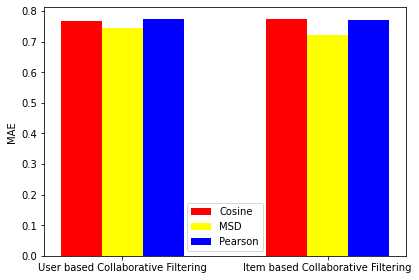

In [50]:
labels = ['User based Collaborative Filtering', 'Item based Collaborative Filtering']

x = np.arange(len(labels))  # the label locations
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, plot_data['MAE']['cosine'], width, color='red')
plt.bar(x, plot_data['MAE']['msd'], width, color='yellow')
plt.bar(x+0.2, plot_data['MAE']['pearson'], width, color='blue')

plt.xticks(x, labels)
plt.ylabel("MAE")
plt.yticks()
plt.tight_layout()
plt.legend(["Cosine", "MSD", "Pearson"])

print('Plot for Ubcf and Ibcf wrt MAE')
plt.show()

Plot for Ubcf and Ibcf wrt RMSE


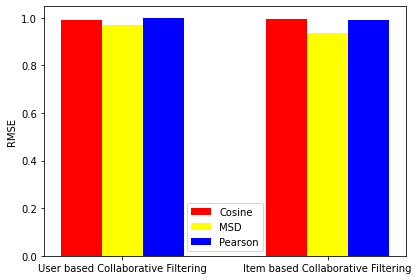

In [52]:
labels = ['User based Collaborative Filtering', 'Item based Collaborative Filtering']

x = np.arange(len(labels))  # the label locations
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, plot_data['RMSE']['cosine'], width, color='red')
plt.bar(x, plot_data['RMSE']['msd'], width, color='yellow')
plt.bar(x+0.2, plot_data['RMSE']['pearson'], width, color='blue')

plt.xticks(x, labels) 
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.tight_layout()

print('Plot for Ubcf and Ibcf wrt RMSE')
plt.show()

In [63]:
min_k_value = 1
mean = 99999
User_Based_Collaborative_Filtering_k_results = []

for i in range(20):
  KNN_User_Based_Collaborative_Filtering = KNNBasic(sim_options={'user_based': True}, k=i)
  Cross_Validation_KNN_User_Based_Collaborative_Filtering = cross_validate(KNN_User_Based_Collaborative_Filtering, ratings_data, measures, verbose=True, cv=5)

  curr_mean = Cross_Validation_KNN_User_Based_Collaborative_Filtering['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  User_Based_Collaborative_Filtering_k_results.append(curr_mean)
  print(i)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.8524  0.8473  0.8498  0.8525  0.8470  0.8498  0.0024  
RMSE (testset)    1.0622  1.0574  1.0550  1.0613  1.0544  1.0581  0.0032  
Fit time          0.18    0.21    0.23    0.18    0.25    0.21    0.03    
Test time         0.93    1.14    0.97    0.73    1.15    0.98    0.15    
0
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

In [53]:
min_k_value = 1
mean = 99999
Item_Based_Collaborative_Filtering_k_results = []

for i in range(20):
  KNN_Item_Based_Collaborative_Filtering = KNNBasic(sim_options={'user_based': False}, k=i)
  Cross_Validation_KNN_Item_Based_Collaborative_Filtering = cross_validate(KNN_Item_Based_Collaborative_Filtering, ratings_data, measures, verbose=True, cv=5)

  curr_mean = Cross_Validation_KNN_Item_Based_Collaborative_Filtering['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  Item_Based_Collaborative_Filtering_k_results.append(curr_mean)
  print(i)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.8540  0.8509  0.8437  0.8482  0.8522  0.8498  0.0036  
RMSE (testset)    1.0615  1.0604  1.0515  1.0554  1.0615  1.0581  0.0040  
Fit time          9.41    6.71    5.74    5.04    4.91    6.36    1.65    
Test time         4.47    5.35    4.28    5.05    4.95    4.82    0.39    
0
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

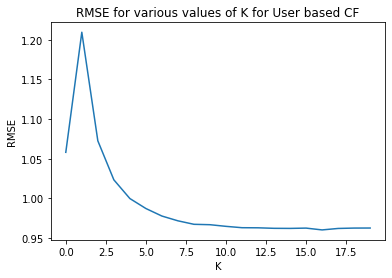

In [64]:
plt.plot(User_Based_Collaborative_Filtering_k_results)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based CF")
plt.show()

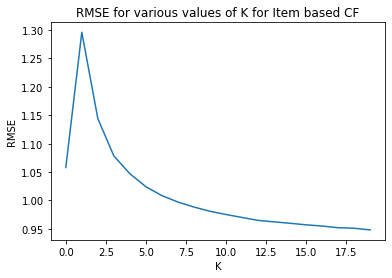

In [65]:
plt.plot(Item_Based_Collaborative_Filtering_k_results)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for Item based CF")
plt.show()

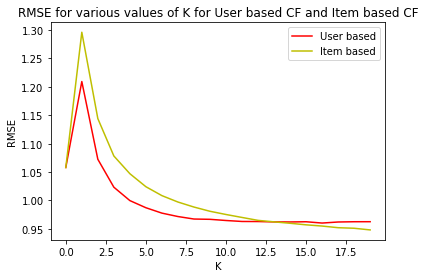

In [66]:
plt.plot(User_Based_Collaborative_Filtering_k_results, color='r')
plt.plot(Item_Based_Collaborative_Filtering_k_results, color='y')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based CF and Item based CF")
plt.legend(["User based", "Item based"])
plt.show()